# Семинар 13: знакомство с PyTorch

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

### План семинара:

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision

from sklearn.datasets import fetch_california_housing
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.89454791, 0.62671519, 0.83696544],
       [0.79351237, 0.73819572, 0.9113559 ],
       [0.84367759, 0.6768935 , 0.31144117],
       [0.05667931, 0.86676424, 0.16686201],
       [0.46677548, 0.60510119, 0.94934391]])

In [3]:
# размеры массива
a.shape

(5, 3)

In [4]:
# сложение
a + 5

array([[5.89454791, 5.62671519, 5.83696544],
       [5.79351237, 5.73819572, 5.9113559 ],
       [5.84367759, 5.6768935 , 5.31144117],
       [5.05667931, 5.86676424, 5.16686201],
       [5.46677548, 5.60510119, 5.94934391]])

In [5]:
# матричное умножение
a @ a.T

array([[1.89349904, 1.93524669, 1.43959495, 0.7335744 , 1.59134718],
       [1.93524669, 2.00516438, 1.45298223, 0.83688806, 1.6822654 ],
       [1.43959495, 1.45298223, 1.26697228, 0.68649384, 1.09906185],
       [0.7335744 , 0.83688806, 0.68649384, 0.78233572, 0.70934602],
       [1.59134718, 1.6822654 , 1.09906185, 0.70934602, 1.48528066]])

In [6]:
# среднее по колонкам
a.mean(axis=0)

array([0.61103853, 0.70273397, 0.63519368])

In [7]:
# решейп
a.reshape(3, 5).shape

(3, 5)

#### Разминка

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [8]:
# YOUR CODE

np.square(np.arange(1, 10_000 + 1)).sum()

np.int64(333383335000)

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [9]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.1860, 0.0111, 0.4686],
        [0.0115, 0.4330, 0.9667],
        [0.7080, 0.1179, 0.5875],
        [0.2215, 0.7167, 0.4317],
        [0.2416, 0.4956, 0.1707]])

In [10]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [11]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [12]:
# сложение
x + 5

tensor([[5.1860, 5.0111, 5.4686],
        [5.0115, 5.4330, 5.9667],
        [5.7080, 5.1179, 5.5875],
        [5.2215, 5.7167, 5.4317],
        [5.2416, 5.4956, 5.1707]])

In [13]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[0.2543, 0.4599, 0.4083, 0.2515, 0.1305],
        [0.4599, 1.1221, 0.6272, 0.7302, 0.3824],
        [0.4083, 0.6272, 0.8604, 0.4949, 0.3298],
        [0.2515, 0.7302, 0.4949, 0.7491, 0.4824],
        [0.1305, 0.3824, 0.3298, 0.4824, 0.3331]])

In [14]:
# очередное матричное умножение
x.mm(x.t())

tensor([[0.2543, 0.4599, 0.4083, 0.2515, 0.1305],
        [0.4599, 1.1221, 0.6272, 0.7302, 0.3824],
        [0.4083, 0.6272, 0.8604, 0.4949, 0.3298],
        [0.2515, 0.7302, 0.4949, 0.7491, 0.4824],
        [0.1305, 0.3824, 0.3298, 0.4824, 0.3331]])

In [15]:
# поэлементное умножение
x * x

tensor([[3.4604e-02, 1.2395e-04, 2.1956e-01],
        [1.3281e-04, 1.8751e-01, 9.3444e-01],
        [5.0133e-01, 1.3897e-02, 3.4521e-01],
        [4.9043e-02, 5.1368e-01, 1.8635e-01],
        [5.8353e-02, 2.4564e-01, 2.9147e-02]])

In [16]:
# среднее по колонкам
x.mean(dim=0)

tensor([0.2737, 0.3549, 0.5250])

In [17]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [18]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [19]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [20]:
# YOUR CODE

# .item() возвращает число из тензора.
# Без этого будет тензор размерности 1x1

torch.square(torch.arange(1, 10_000 + 1)).sum().item()

333383335000

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [21]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[ 3.1273e-33,  0.0000e+00, -9.3646e+32],
        [ 4.5312e-41,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [22]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.4494, 0.3123, 0.5458],
        [0.3803, 0.9587, 0.1107],
        [0.0626, 0.0831, 0.9323],
        [0.7763, 0.7940, 0.6830],
        [0.9084, 0.8452, 0.3679]])

In [23]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [24]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [25]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [26]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.9175,  1.3198, -1.9665],
        [ 0.1400, -0.5357,  0.1686],
        [ 0.6938, -0.7531,  0.0027],
        [-0.4073,  0.6166, -0.1079],
        [-0.5146, -0.2694, -0.1435]])

In [27]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [28]:
x

tensor([[0.6323, 0.8909, 0.3998],
        [0.0913, 0.5627, 0.5946],
        [0.2516, 0.1888, 0.4040],
        [0.7062, 0.0588, 0.7899],
        [0.3183, 0.0460, 0.8865]])

In [29]:
y

tensor([[0.6628, 0.9046, 0.0452],
        [0.6806, 0.4161, 0.4242],
        [0.9739, 0.9719, 0.4131],
        [0.0800, 0.3915, 0.9507],
        [0.5321, 0.8017, 0.2828]])

In [30]:
# сложение
x + y

tensor([[1.2951, 1.7955, 0.4449],
        [0.7719, 0.9788, 1.0188],
        [1.2255, 1.1607, 0.8172],
        [0.7863, 0.4502, 1.7406],
        [0.8504, 0.8477, 1.1694]])

In [31]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[1.2951, 1.7955, 0.4449],
        [0.7719, 0.9788, 1.0188],
        [1.2255, 1.1607, 0.8172],
        [0.7863, 0.4502, 1.7406],
        [0.8504, 0.8477, 1.1694]])

In [32]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[1.2951, 1.7955, 0.4449],
        [0.7719, 0.9788, 1.0188],
        [1.2255, 1.1607, 0.8172],
        [0.7863, 0.4502, 1.7406],
        [0.8504, 0.8477, 1.1694]])

In [33]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [34]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [35]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [36]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [37]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [38]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [39]:
np.allclose(x[:, 1], a[:, 1])

True

In [40]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [41]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

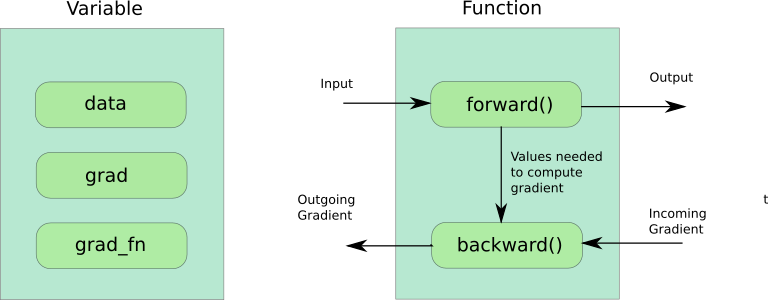

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

#### Разминка с градиентами

Дана функция: $$\large  f(x,y,z) = (x + y) * max(y, z)$$.

вычислите производные для $x, y, z$ в точке $(1, 2, 0)$ с помощью `tensor.backward()` и `tensor.grad`.

In [42]:
# YOUR CODE

# Определяем x, y и z
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
z = torch.tensor(0., requires_grad=True)

# Зададим q как сумму x и y, также зададим f как произведение q на max(y,z)
q = x + y
f = q * torch.max(y,z)

# Вычисляем производную
f.backward()

# Печатаем значения
print("Derivative of f by x is: " + str(x.grad))
print("Derivative of f by y is: " + str(y.grad))
print("Derivative of f by z is: " + str(z.grad))

Derivative of f by x is: tensor(2.)
Derivative of f by y is: tensor(5.)
Derivative of f by z is: tensor(0.)


[California](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)

X: MedInc (median income in block group).

y: the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

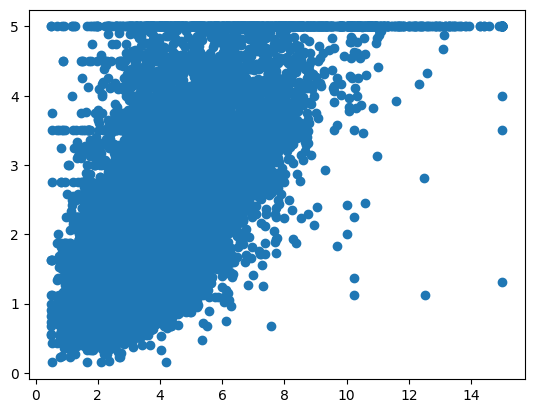

In [43]:
housing = fetch_california_housing()
plt.scatter(housing.data[:, 0], housing.target);

In [44]:
w = torch.rand(1, requires_grad=True) # задайте torch.rand с 1 и requires_grad=True
b = torch.rand(1, requires_grad=True) # задайте torch.rand с 1 и requires_grad=True

x = torch.tensor(housing.data[:, 0] / housing.data[:, 0].max(), dtype=torch.float32)
y = torch.tensor(housing.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [45]:
x.size(), y.size()

(torch.Size([20640]), torch.Size([20640]))

In [46]:
# YOUR CODE

y_pred = w * x + b # определите y_pred в виде линейного уравнения для w, x и b
loss = torch.mean((y_pred - y) ** 2) # задайте MSE loss с помощью torch.mean для y_pred и y
loss.backward() # реализуйте backward для loss

In [47]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-0.9214])
dL/db = tensor([-2.8345])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [48]:
w.data, w.grad

(tensor([0.3478]), tensor([-0.9214]))

In [49]:
w

tensor([0.3478], requires_grad=True)

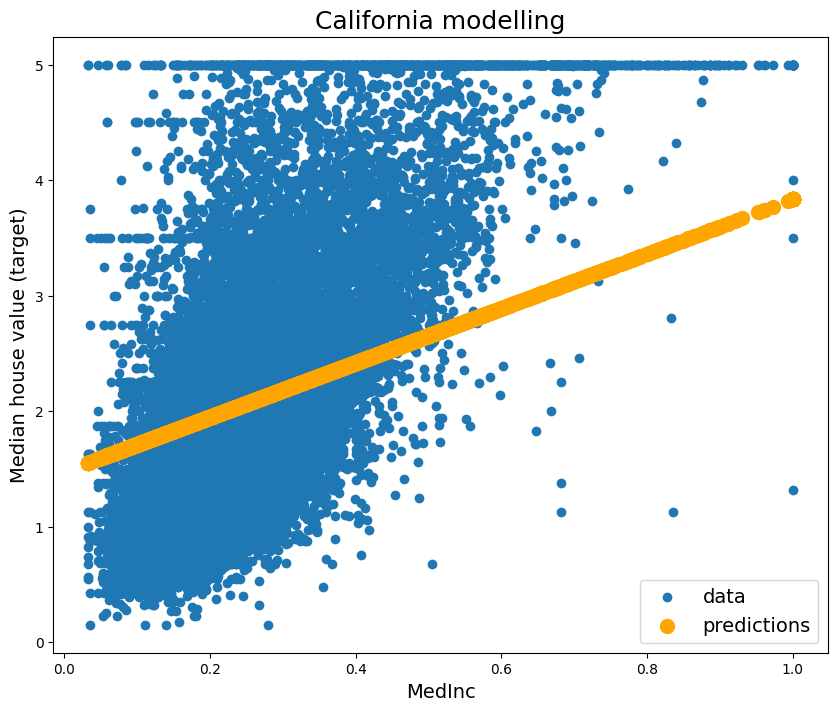

loss =  0.94668555
Done!


In [50]:
from IPython.display import clear_output

for i in range(300):
    ### BEGIN SOLUTION
    y_pred = w * x + b # определите y_pred в виде линейного уравнения для w, x и b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2) # задайте MSE loss с помощью torch.mean для y_pred и y
    loss.backward() # реализуйте backward для loss
    ### END SOLUTION

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("MedInc", fontsize=14)
        plt.ylabel("Median house value (target)", fontsize=14)
        plt.title("California modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.95:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему

Зачем отдельный класс? Почему не просто знакомые `X, y`?

-Потому что не всегда возможно все данные хранить в оперативной памяти одновременно. Например, нейросеть обучается определять, что изображено на картинках из Интернета - там миллионы картинок - они лежат в файлах с названиями вида `dog_picture_1.jpg`, `cat_picture_123.jpg`, тогда класс датасет должен будет открывать нужный файл, выделять нужный класс из его названия.




Давайте опишем конкретный `Dataset` сами - он будет для задачи регрессии: объект - это число от 1 до `n` включительно, а таргет - квадрат числа.

In [51]:
class SampleDataset(torch.utils.data.Dataset):
    def __init__(self, n):
        self.n = n

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        return torch.tensor([idx + 1], dtype=torch.float), torch.tensor((idx+1)**2)

In [52]:
our_dataset = SampleDataset(10)

In [53]:
our_dataset.__getitem__(1)

(tensor([2.]), tensor(4))

In [54]:
our_dataset[3]

(tensor([4.]), tensor(16))

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [55]:
dataloader = torch.utils.data.DataLoader(our_dataset,
                                         batch_size=4,
                                         shuffle=True #полезно при обучении
                                         )

Работают с ним следующим образом:

In [56]:
batch = next(iter(dataloader))

batch

[tensor([[9.],
         [7.],
         [4.],
         [8.]]),
 tensor([81, 49, 16, 64])]

Или просто пройтись с помощью цикла `for`

In [57]:
for batch in dataloader:
  print(batch)

[tensor([[8.],
        [9.],
        [7.],
        [3.]]), tensor([64, 81, 49,  9])]
[tensor([[ 5.],
        [10.],
        [ 2.],
        [ 6.]]), tensor([ 25, 100,   4,  36])]
[tensor([[4.],
        [1.]]), tensor([16,  1])]


Другой пример датасета: наши данные - картинки, лежат в папке, название файла: `label_i.png`, где `label` - это класс, который будет предсказывыаться (0,1,...9), а `i` - это просто номер картинки.

In [58]:
!wget https://github.com/hse-ds/ml-hse-nes/raw/refs/heads/main/2025/seminars/seminar13/digit_pictures.zip
!unzip digit_pictures.zip

--2025-12-12 06:02:04--  https://github.com/hse-ds/ml-hse-nes/raw/refs/heads/main/2025/seminars/seminar13/digit_pictures.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hse-ds/ml-hse-nes/refs/heads/main/2025/seminars/seminar13/digit_pictures.zip [following]
--2025-12-12 06:02:04--  https://raw.githubusercontent.com/hse-ds/ml-hse-nes/refs/heads/main/2025/seminars/seminar13/digit_pictures.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12481 (12K) [application/zip]
Saving to: ‘digit_pictures.zip’

digit_pictures.zip  100%[===================>]  12.19K  --.-KB/s    in 0s      

2025-12-12 0

In [59]:
import glob
from torchvision.io import decode_image

class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, img_dir):
        self.files_list = sorted(glob.glob(img_dir+'/*'))

    def __len__(self):
        return len(self.files_list)

    def __getitem__(self, idx):
        #Загружаем картинку
        img_path = self.files_list[idx]
        image = decode_image(img_path)[0]
        #Лейбл берем из названия
        label = torch.tensor(int(img_path.split('/')[1].split('_')[0]))
        return image, label

Готовим датасет

In [60]:
from torchvision import transforms

ds = CustomImageDataset('digit_pictures')
len(ds)

20

In [61]:
ds[4][0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  27,  94,  33,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  98, 247, 253, 247,
         199, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 157, 170, 209, 253,
         253, 240,  72,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

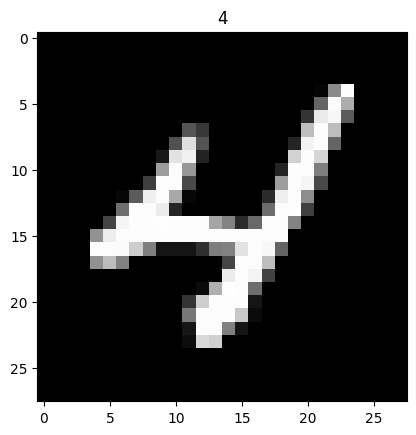

In [62]:
idx = 8
plt.imshow(ds[idx][0], cmap='grey')
plt.title(ds[idx][1].item());

#### Как сделать нейросеть

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [63]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(1, 30))  # добавили слой с 1 нейроном на вход и 30 на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(30, 1))  # добавили слой с 30 нейронами на вход и 1 на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(1, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [64]:
y_pred = model(batch[0])  # получили предсказания модели
y_pred

tensor([[1.6522],
        [0.4083]], grad_fn=<AddmmBackward0>)

#### Как написать цикл обучения и отслеживать метрики

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [65]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=4,
    shuffle=True,
    num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val,
    batch_size=4,
    shuffle=False,
    num_workers=1
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 348kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.23MB/s]


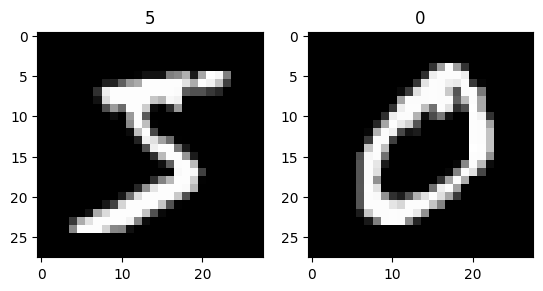

In [66]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]), cmap='grey')
    plt.title(str(mnist_train[i][1]))
plt.show()

In [67]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [68]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-0.0003,  0.0105,  0.0228,  ...,  0.0163, -0.0206, -0.0212],
          [ 0.0169, -0.0069, -0.0243,  ..., -0.0233,  0.0251, -0.0107],
          [-0.0270,  0.0144, -0.0222,  ...,  0.0033,  0.0050, -0.0071],
          ...,
          [-0.0290, -0.0162, -0.0214,  ..., -0.0135, -0.0050, -0.0356],
          [-0.0301,  0.0257, -0.0340,  ..., -0.0294, -0.0184,  0.0087],
          [ 0.0225, -0.0310,  0.0041,  ..., -0.0280,  0.0049,  0.0171]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 0.0146, -0.0343,  0.0130, -0.0200, -0.0081, -0.0263, -0.0307, -0.0353,
          -0.0186,  0.0167, -0.0261, -0.0189, -0.0014,  0.0246, -0.0266,  0.0287,
          -0.0326,  0.0186,  0.0254, -0.0237, -0.0026, -0.0074, -0.0173, -0.0301,
          -0.0036,  0.0076,  0.0098,  0.0073,  0.0072,  0.0337, -0.0340,  0.0109,
          -0.0051,  0.0260, -0.0310, -0.0098, -0.0259, -0.0096,  0.0344, -0.0217,
          -0.0263,  0.0294, -0.0262, 

Посмотрим на то, как будет обучаться наша модель. Это может занять несколько минут.

In [69]:
# Создаем списки для сбора метрик
epochs_list = []
losses_list = []
accuracies_list = []

# Всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из валидационного лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())

        # Сохраняем метрики для визуализации
        current_loss = np.mean(val_loss)
        current_accuracy = np.mean(val_accuracy)

        epochs_list.append(epoch)
        losses_list.append(current_loss)
        accuracies_list.append(current_accuracy)

        # Печатаем метрики
        print(f"Epoch: {epoch}, loss: {current_loss}, accuracy: {current_accuracy}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.13840129971504211, accuracy: 0.9582


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.10235629975795746, accuracy: 0.9717


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.09708044677972794, accuracy: 0.9731


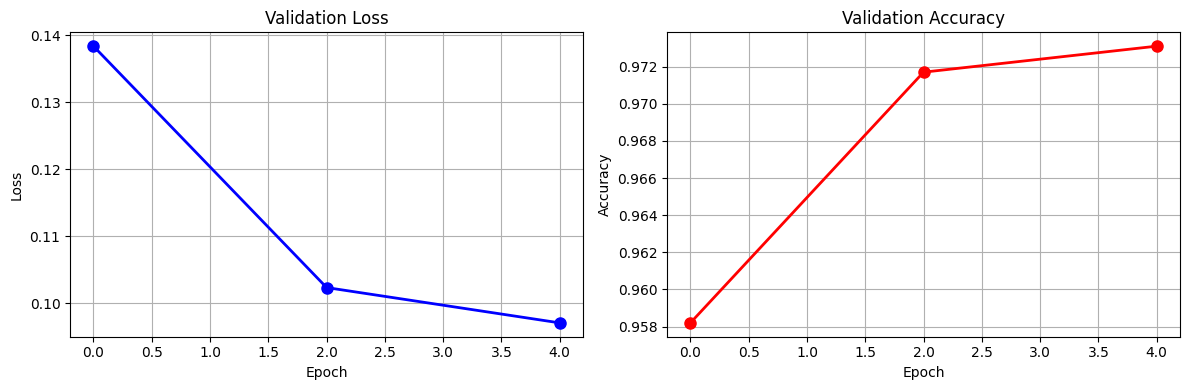


Final metrics - Loss: 0.0971, Accuracy: 0.9731


In [70]:
plt.figure(figsize=(12, 4))

# График loss
plt.subplot(1, 2, 1)
plt.plot(epochs_list, losses_list, 'b-o', linewidth=2, markersize=8)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# График accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_list, accuracies_list, 'r-o', linewidth=2, markersize=8)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод финальных метрик
print(f"\nFinal metrics - Loss: {losses_list[-1]:.4f}, Accuracy: {accuracies_list[-1]:.4f}")

# Бонус: пример для задачи регрессии

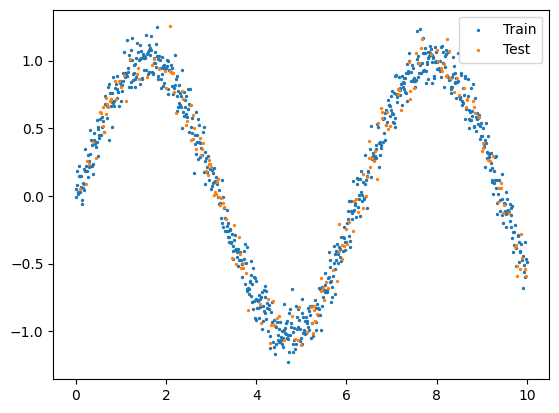

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Генерация данных: y = sin(x) + шум
np.random.seed(42)
X = np.linspace(0, 10, 1000).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(1000, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.scatter(X_train[:,0], y_train, label='Train', s=2)
plt.scatter(X_test[:,0], y_test, label='Test', s=2)
plt.legend();

In [72]:
# Конвертация в тензоры PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

Модель: 3 линейных слоя, функция активации между - ReLU, dropout между первым и вторым слоями

In [73]:
class RegressionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 64)  # Входной слой → 64 нейрона
        self.fc2 = nn.Linear(64, 32) # Скрытый слой → 32 нейрона
        self.fc3 = nn.Linear(32, 1)  # Выходной слой → 1 значение
        self.dropout = nn.Dropout(0.2)  # Dropout для регуляризации

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RegressionNN()

Функция потерь - MSE

In [74]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [75]:
epochs = 1000
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Обучение
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Тестирование
    model.eval() # Отключает Dropout и BatchNorm
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [100/1000], Train Loss: 0.1046, Test Loss: 0.0765
Epoch [200/1000], Train Loss: 0.0448, Test Loss: 0.0194
Epoch [300/1000], Train Loss: 0.0335, Test Loss: 0.0136
Epoch [400/1000], Train Loss: 0.0284, Test Loss: 0.0133
Epoch [500/1000], Train Loss: 0.0296, Test Loss: 0.0118
Epoch [600/1000], Train Loss: 0.0246, Test Loss: 0.0115
Epoch [700/1000], Train Loss: 0.0253, Test Loss: 0.0108
Epoch [800/1000], Train Loss: 0.0225, Test Loss: 0.0103
Epoch [900/1000], Train Loss: 0.0209, Test Loss: 0.0101
Epoch [1000/1000], Train Loss: 0.0207, Test Loss: 0.0100


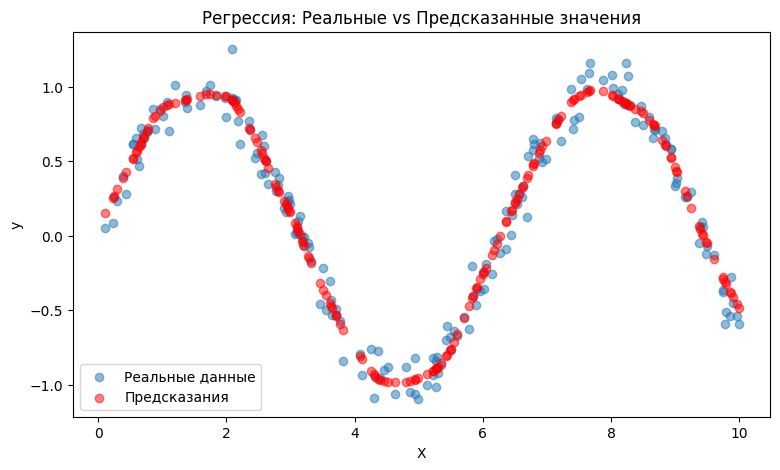

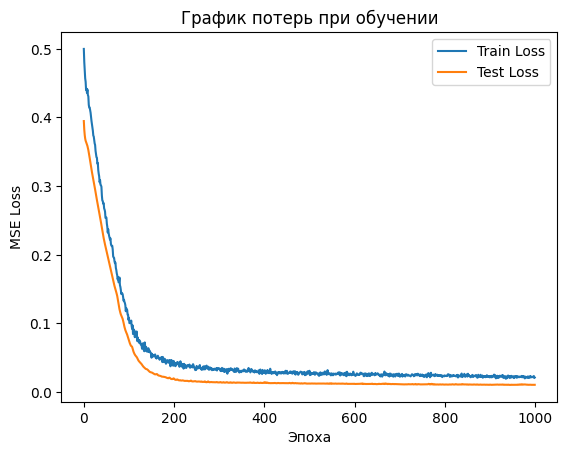

In [76]:
# Предсказания на тестовых данных
with torch.no_grad():
    predicted = model(X_test_tensor).numpy()

# График данных и предсказаний
plt.figure(figsize=(9, 5))
plt.scatter(X_test, y_test, label='Реальные данные', alpha=0.5)
plt.scatter(X_test, predicted, label='Предсказания', color='red', alpha=0.5)
plt.title('Регрессия: Реальные vs Предсказанные значения')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# График потерь
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('График потерь при обучении')
plt.xlabel('Эпоха')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

### Дополнительные материалы:

* [Хорошая книга про pytorch](https://github.com/borninfreedom/DeepLearning/blob/master/Books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](https://www.cs.toronto.edu/~duvenaud/talks/Johnson-Automatic-Differentiation.pdf)